In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Rreading train dataset
file_path = "../data/before40after60Origin.csv"
raw_data = pd.read_csv(file_path)
print("Data points count: ", raw_data['id'].count())
raw_data.head()


Data points count:  7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
data_1 = raw_data[raw_data["target"]==1]
data_1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
data1 = data_1.sample(n=2454)
data1

,id,keyword,location,text,target
1691,2441,collide,"Houston, Texas",When Houston and NYC collide. ?? @pageparkesco...,1
224,318,annihilated,NaN,@violentfeminazi I guess that's ok for Armenia...,1
1645,2375,collapsed,Suplex City,@durrellb Prices here are insane. Our dollar h...,1
1443,2081,casualty,Virginia,@AvBronstein @Popehat @instapundit @KurtSchlic...,1
2998,4306,dust%20storm,NaN,Kids Disappear in Dust Storm in Atmospheric Au...,1
...,...,...,...,...,...
2415,3474,derailed,"Washington, DC",Metro acting chief Jack Requa says train that ...,1
5094,7266,nuclear%20disaster,NaN,Fukushima Nuclear Disaster | Increased Thyroid...,1
3191,4580,emergency%20plan,U.S. Northern Virginia,#Biztip We recommend all businesses to get an ...,1
1757,2528,collision,"San Francisco, CA",Dublin I580 E / I580 E North Flynn Rd Onr **Tr...,1


In [5]:
data_2 = raw_data[raw_data["target"]==0]
data_2

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [6]:
data2 = data_2.sample(n=4342)
data2

,id,keyword,location,text,target
823,1198,blizzard,Colorado/WorldWide,@Blizzard_Gamin ight,0
5892,8414,sandstorm,NaN,Who need friends when there's booze and Darude...,0
5046,7194,mudslide,NaN,@nikistitz even the one that looked like a mud...,0
6895,9884,traumatised,North East / Middlesbrough,Sending a snapchat to the wrong person instead...,0
6665,9553,threat,"Arlington, VA",Get access to the most extensive sources of th...,0
...,...,...,...,...,...
5986,8547,screams,marvel | books | hp | tmr,*screams in 25 different languages*,0
7184,10294,weapon,New York 2099,@DwarfOnJetpack I guess I can say you and me m...,0
1682,2427,collide,Michigan,@mattcohen4fake Gamma Ray January Worlds Colli...,0
3144,4518,emergency,"Wildomar, CA",When your child needs emergency care they can ...,0


In [7]:
# 드리프트 전 데이터
# 초기 실험 데이터 재난:20% 평시: 80%
# 1080개 4342개
train1 = pd.concat([data1, data2])
train1 = train1.sample(len(train1))
train1

,id,keyword,location,text,target
1784,2560,crash,NaN,@SterlingKnight Who had a car crashsterling!W...,0
6560,9386,survived,Puerto Rico,@duchovbutt @Starbuck_Scully @MadMakNY @davidd...,0
659,953,blaze,302,Yo I got bars and I'm not even a rapper,0
4020,5711,forest%20fire,NaN,E1.1.2 Particulate=Break up of Solid Combust F...,1
3405,4875,explode,"Yamaku Academy, Class 3-4",KS except every character is Shizune.\nThe wor...,0
...,...,...,...,...,...
543,790,avalanche,Canada,What a feat! Watch the #BTS of @kallemattson's...,0
1660,2397,collapsed,NaN,Look: #I have collapsed #after attempting to m...,0
5423,7739,panicking,South Florida,People are finally panicking about cable TV ht...,0
6255,8938,snowstorm,Mpela'zwe,LRT refer to the lyrics to hear Big Boi explai...,0


Text(0.5, 0.98, 'Target Value Counts')

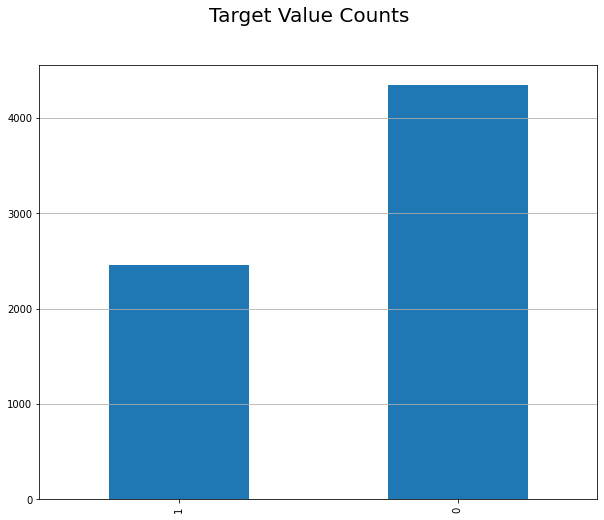

In [8]:
# Plotting target value counts
plt.figure(figsize=(10,8))
ax = train1['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
# plt.show()

In [9]:
train1.to_csv('../data/preprocess_data.csv', index=False)